In [1]:
import statsmodels # http://www.statsmodels.org/devel/generated/statsmodels.nonparametric.kernel_density.KDEMultivariate.html
import statsmodels.api as sm

In [12]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import root_numpy

In [7]:
f = r.TFile("../images/PDF_ry_y_r_combined_Calo05.root")
f.ls()
c = f.Get("c")
print([x for x in c.GetListOfPrimitives()])
c1 = c.GetPrimitive("c_1")
print([x for x in c1.GetListOfPrimitives()])
h5_ry_scaled = c1.GetPrimitive("h5_ry_scaled").Clone("h5_ry_scaled")
h5_ry_scaled.SetDirectory(0)

[<ROOT.TPad object ("c_1") at 0x7f59d1aa2bc0>, <ROOT.TPad object ("c_2") at 0x7f59d1aae6d0>, <ROOT.TPad object ("c_3") at 0x7f59d1a87b50>, <ROOT.TPad object ("c_4") at 0x7f59d1aacc60>]
[<ROOT.TFrame object ("TFrame") at 0x7f59d1a7ee70>, <ROOT.TH2D object ("h5_ry_scaled") at 0x7f59d1ac61a0>, <ROOT.TPaveText object ("title") at 0x7f59d1a8e2b0>]
TFile**		../images/PDF_ry_y_r_combined_Calo05.root	
 TFile*		../images/PDF_ry_y_r_combined_Calo05.root	
  KEY: TCanvas	c;1	c


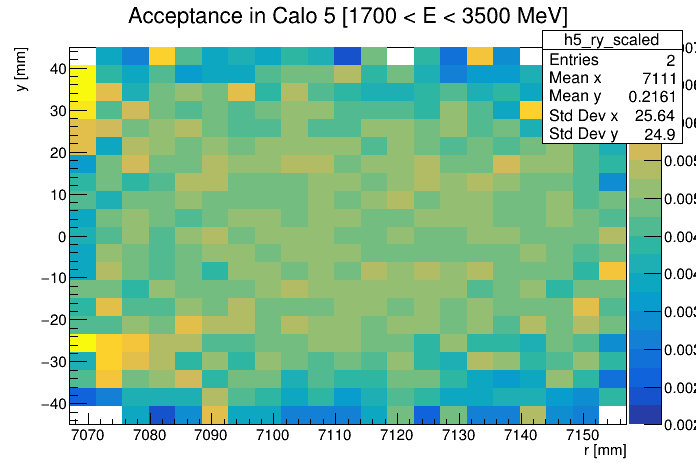

In [8]:
c = r.TCanvas()
h5_ry_scaled.Draw("colz")
c.Draw()

In [19]:
data, edges = root_numpy.hist2array(h5_ry_scaled,return_edges=True)

In [20]:
data

array([[0.        , 0.00270027, 0.00465116, 0.00402068, 0.00770077,
        0.00464728, 0.00427673, 0.00498148, 0.00387197, 0.00399546,
        0.00400586, 0.00384211, 0.00465863, 0.00438374, 0.00372881,
        0.00586054, 0.0058309 , 0.0066054 , 0.00878049, 0.0078329 ,
        0.        ],
       [0.        , 0.00316581, 0.00615655, 0.00642096, 0.00635048,
        0.00461741, 0.00580183, 0.00481746, 0.00529693, 0.00502747,
        0.00460631, 0.00494291, 0.00416255, 0.0047954 , 0.00499309,
        0.00389294, 0.00564186, 0.00460417, 0.00576677, 0.00440882,
        0.00392927],
       [0.00399734, 0.00411946, 0.00482759, 0.00586922, 0.00600228,
        0.00502756, 0.00468708, 0.00425618, 0.00479321, 0.00488625,
        0.00514735, 0.00507774, 0.00496113, 0.00442486, 0.00551798,
        0.00541126, 0.00483539, 0.00560086, 0.00410959, 0.0037831 ,
        0.00318674],
       [0.00228415, 0.00413743, 0.00522345, 0.005339  , 0.00528411,
        0.00495808, 0.00458827, 0.0051796 , 0.0046755

In [21]:
edges

[array([7067.        , 7071.28571429, 7075.57142857, 7079.85714286,
        7084.14285714, 7088.42857143, 7092.71428571, 7097.        ,
        7101.28571429, 7105.57142857, 7109.85714286, 7114.14285714,
        7118.42857143, 7122.71428571, 7127.        , 7131.28571429,
        7135.57142857, 7139.85714286, 7144.14285714, 7148.42857143,
        7152.71428571, 7157.        ]),
 array([-45.        , -40.71428571, -36.42857143, -32.14285714,
        -27.85714286, -23.57142857, -19.28571429, -15.        ,
        -10.71428571,  -6.42857143,  -2.14285714,   2.14285714,
          6.42857143,  10.71428571,  15.        ,  19.28571429,
         23.57142857,  27.85714286,  32.14285714,  36.42857143,
         40.71428571,  45.        ])]

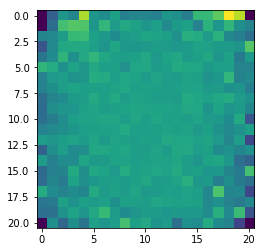

In [24]:
plt.imshow(data,origin='upper')
plt.show()

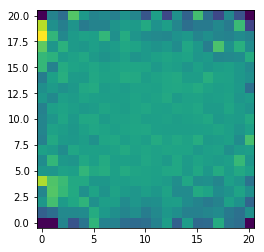

In [26]:
plt.imshow(data.T,origin='lower')
plt.show()

### Lets try fitting these with a gaussian KDE with the bin centers as the coordinates and the bin contents as weights

In [36]:
binLocations = []
binContents = []
for i in range(1,h5_ry_scaled.GetNbinsX()):
    for j in range(1,h5_ry_scaled.GetNbinsY()):
        centerix = h5_ry_scaled.GetXaxis().GetBinCenter(i)
        centeriy = h5_ry_scaled.GetYaxis().GetBinCenter(i)
        contenti = h5_ry_scaled.GetBinContent(i,j)
        print(centerix ,centeriy , contenti)
        
        binLocations.append((centerix, centeriy))
        binContents.append(contenti)

7069.142857142857 -42.857142857142854 0.0
7069.142857142857 -42.857142857142854 0.0027002700270027003
7069.142857142857 -42.857142857142854 0.004651162790697674
7069.142857142857 -42.857142857142854 0.00402067777139575
7069.142857142857 -42.857142857142854 0.007700770077007701
7069.142857142857 -42.857142857142854 0.004647283126787417
7069.142857142857 -42.857142857142854 0.004276729559748427
7069.142857142857 -42.857142857142854 0.004981479116106783
7069.142857142857 -42.857142857142854 0.0038719669592152815
7069.142857142857 -42.857142857142854 0.003995459704880818
7069.142857142857 -42.857142857142854 0.0040058580289455544
7069.142857142857 -42.857142857142854 0.003842107670493528
7069.142857142857 -42.857142857142854 0.004658626222889383
7069.142857142857 -42.857142857142854 0.004383735705209657
7069.142857142857 -42.857142857142854 0.003728813559322034
7069.142857142857 -42.857142857142854 0.005860542997249133
7069.142857142857 -42.857142857142854 0.0058309037900874635
7069.142857

In [37]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
#mu=np.array([1,10,20])
#sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
#data=np.random.multivariate_normal(mu,sigma,1000)
#values = data.T
values = np.array([x for x in zip(*binLocations)])
weights = np.array(binContents)

kde = stats.gaussian_kde(values,weights=weights)

In [46]:
density = kde(values)
pdf = kde.pdf(values)

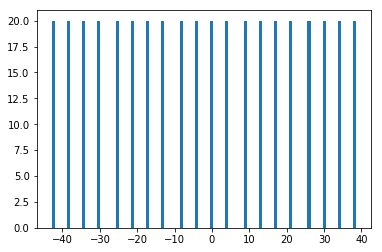

In [51]:
plt.hist(values[1],bins=100)
plt.show()

(array([[40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 40.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 40.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 40.]]),
 array([7069.14285714, 7077.28571429, 7085.42857143, 7093.57142857,
        7101.71428571, 7109.85714286, 7118.        , 7126.14285714,
        7134.28571429, 7142.42857143, 7150.57142857]),
 array([-42.85714286, -34.71428571, -26.57142857, -18.42857143,
        -10.28571429,  -2.14285714,   6.        ,  14.14285714,
         22.28571429,  30.42857143,  38.57142857]),
 <matplotlib.image.AxesImag

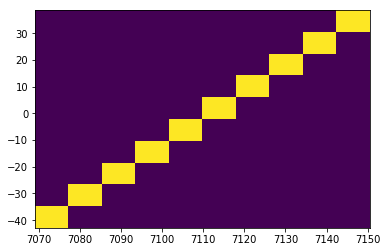

In [52]:
plt.hist2d(values[0], values[1])